In [53]:
import pandas as pd
import numpy as np
# from google.colab import drive

In [54]:
# drive.mount('/content/drive')

In [55]:
from google.colab import files 
uploaded=files.upload()

In [56]:
# give path to the data.csv 
file_path = '/content/data.csv'

As one may see, the csv file contains actual labels and the predicted probabilities from two ML model (random forest and logistic regression).

In [57]:
df = pd.read_csv(file_path, error_bad_lines=False)
df.head()


,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


You have to take a threshold value and will have to predict final label. 
So add two new columns named as 'y_pred_rf'and 'y_pred_lr' in the df dataframe. These new columns will have final label predicted by the two models based on the threshold set.

In [58]:
thresh = 0.4
df['y_pred_rf'] = (df.y_pred_random_forest >= 0.4).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= 0.4).astype('int')
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,1,1
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,1
4,0,0.418302,0.369532,1,0


In [59]:
df.shape

(15758, 5)

Complete below function to compute true positive (tp), tn, fn, tn

In [60]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp = 0
  fp = 0
  tn = 0
  fn = 0

  for i in range(len(y_pred)): 
    if y_act[i]==y_pred[i]==1:
      tp += 1
    if y_pred[i]==1 and y_act[i]!=y_pred[i]:
      fp += 1
    if y_act[i]==y_pred[i]==0:
      tn += 1
    if y_pred[i]==0 and y_act[i]!=y_pred[i]:
      fn += 1
  return tp, tn, fp, fn

In [61]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 6535
TN for Logistic Reg : 2862
FP for Logistic Reg : 5017
FN for Logistic Reg : 1344


In [62]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 7411
TN for Random Forest : 1930
FP for Random Forest : 5949
FN for Random Forest : 468


Let's verify result from sklearn

In [63]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [64]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 7411
TN for Random Forest : 1930
FP for Random Forest : 5949
FN for Random Forest : 468


In a similar way complete all the functions below

In [65]:
def compute_accuracy(tp, tn, fn, fp):
  acc = (tp + tn)/(tp + tn + fp + fn)
  return acc

In [66]:
print('Accuracy for Logistic Regression :', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 0.5963320218301815
Accuracy for Random Forest : 0.5927782713542328


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Random Forest :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 59.633202183018156
Accuracy for Random Forest : 59.27782713542328


In [69]:
def compute_precision(tp, fp):
	prec = tp / (tp + fp)
	return prec

In [70]:
print('Precision for Logistic Regression :', compute_precision(tp_lr, fp_lr))
print('Precision for Random Forest :', compute_precision(tp_rf, fp_rf))

Precision for Logistic Regression : 0.5657029085872576
Precision for Random Forest : 0.5547155688622755


In [71]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 56.570290858725755
Precision for Random Forest : 55.471556886227546


In [72]:
def compute_recall(tp, fn):
	rcl = tp / (tp + fn)
	return rcl

In [73]:
print('Recall for Logistic Regression :', compute_recall(tp_lr, fn_lr))
print('Recall for Random Forest :', compute_recall(tp_rf, fn_rf))

Recall for Logistic Regression : 0.8294199771544613
Recall for Random Forest : 0.9406015991877141


In [74]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 82.94199771544612
Recall for Random Forest : 94.06015991877142


In [75]:
def compute_f1_score(y_true, y_pred):
  tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
  prec = compute_precision(tp, fp)
  rcl = compute_recall(tp, fn)
  f1_score = 2*((prec*rcl)/(prec+rcl))
  return f1_score

In [76]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                             df.y_pred_rf))

F1 score for Logistic Regression : 0.6726365086717101
F1 score for Random Forest : 0.6978671312208673


In [77]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.6726365086717101
F1 score for Random Forest : 0.6978671312208673


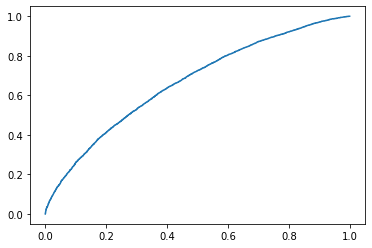

AUC: 0.33425647961591176


In [78]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

y_true = df.y_act
y_probas = df.y_pred_logistic
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print ROC curve
plt.plot(tpr,fpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)